# Load and display script results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rates.auxillary import read_numpy_file, write_numpy_file


plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{mathtools}')
plt.rc('font', size=10, family='serif', serif='cm')

num_n_train = 100
nb_down_trials = 200
num_n_up = 50
nb_up_trials = 100
error = {}
error['cl'] = read_numpy_file('/home/vivc/Data/icml2/cl_data.npy', shape=(nb_up_trials, num_n_up, nb_down_trials, num_n_train)).mean(axis=(0, 2))
error['reg'] = read_numpy_file('/home/vivc/Data/icml2/reg_data.npy', shape=(nb_up_trials, num_n_up, nb_down_trials, num_n_train)).mean(axis=(0,2))

min_n_train = 30
max_n_train = 1000
min_n_up = 30
max_n_up = 1000

ns_up = np.logspace(np.log10(min_n_up), np.log10(max_n_up), num=num_n_up).astype(int)
ns_down = np.logspace(np.log10(min_n_train), np.log10(max_n_train), num=num_n_train).astype(int)
nX, nY = np.meshgrid(ns_up, ns_down)


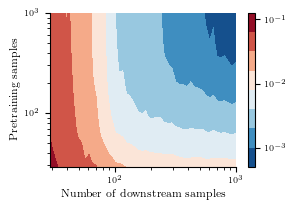

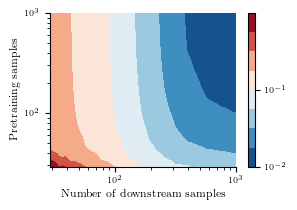

In [3]:
for name in ['cl', 'reg']:
    fig, ax = plt.subplots(figsize=(3, 2))
    # ax.contourf(nX, nY, error_reg.mean(axis=(0, 2)))
    s = ax.contourf(nX, nY, np.log10(error[name]).T, cmap='RdBu_r')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.set_xlabel('Number of downstream samples', fontsize=8)
    ax.set_ylabel('Pretraining samples', fontsize=8)
    c = fig.colorbar(s, ticks=[-1, -2, -3])
    c.ax.set_yticklabels([r'$10^{-1}$',r'$10^{-2}$', r'$10^{-3}$'])  # vertically oriented colorbar
    c.ax.tick_params(labelsize=6)
    # fig.tight_layout()
    fig.savefig(name + '.pdf', pad_inches=0.1, bbox_inches='tight')